In [1]:
import numpy as np

In [2]:
np.linspace(0, 10, 5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [3]:
import matplotlib.pyplot as plt

times = [0, 0.5, 1]
vals = [0, 1e-3, 0]
total_num_steps = 1000

In [4]:
steps = [int(x * total_num_steps) for x in times]
steps

[0, 499, 999]
[0, 1e-3, 0]

[0, 0.001, 0]

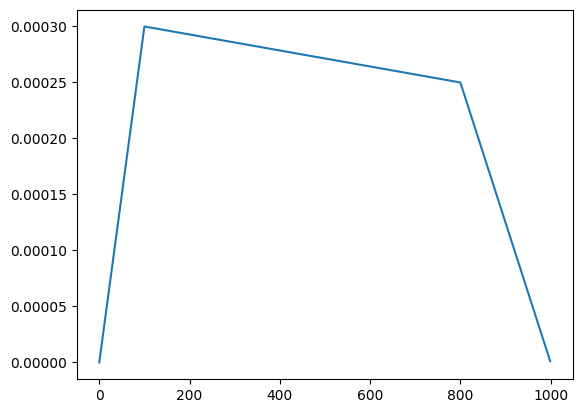

In [13]:
times = [0, 0.1, 0.8, 1]
values = [0, 3e-4, 2.5e-4, 0]
total_num_steps = 1000  # TODO: assert this is positive and greater than times[-1]
steps = np.arange(total_num_steps)
interp_values = np.interp(steps / total_num_steps, times, values)
plt.plot(interp_values)
plt.show()

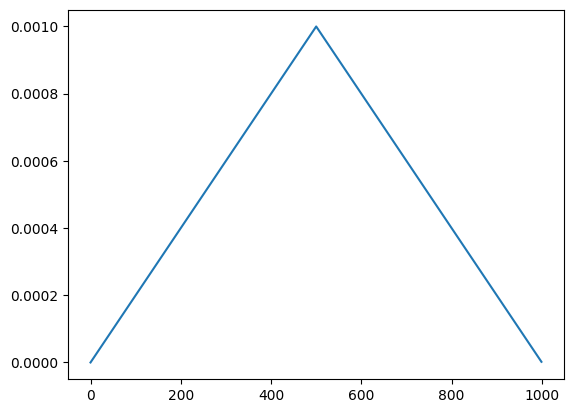

In [5]:
times = [0, 0.5, 1]  # TODO: assert this is positive and monotonically increasing
values = [0, 1e-3, 0]
total_num_steps = 1000  # TODO: assert this is positive and greater than times[-1]
steps = np.arange(total_num_steps)
interp_values = np.interp(steps / total_num_steps, times, values)
plt.plot(interp_values)
plt.show()

In [6]:
from bisect import bisect_left

np.searchsorted([0, 0.5, 1], 4, side="left")

bisect_left([0, 0.5, 1], 4)

3

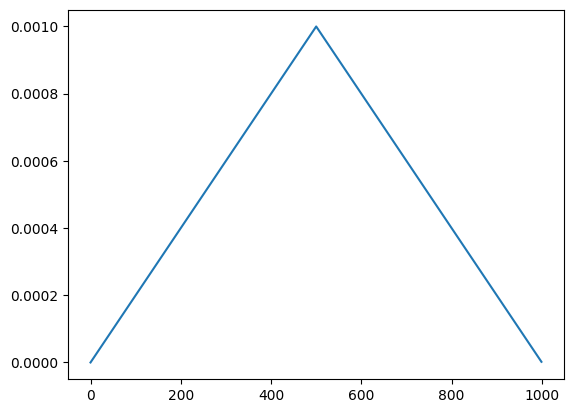

In [7]:
from typing import Union


def interp_single(value, times, values) -> float:
    # `numpy.interp`-like function for single value
    left_idx = bisect_left(times, value)
    if left_idx == 0:
        return values[0]
    elif left_idx == len(times):
        return values[-1]
    else:
        slope = (values[left_idx] - values[left_idx - 1]) / (
            times[left_idx] - times[left_idx - 1]
        )
        return values[left_idx - 1] + slope * (value - times[left_idx - 1])


interp_values = [
    interp_single(step / total_num_steps, times, values)
    for step in range(total_num_steps)
]
plt.plot(interp_values)
plt.show()

## timing

In [14]:
times = [0, 0.1, 0.8, 1]
values = [0, 3e-4, 2.5e-4, 0]

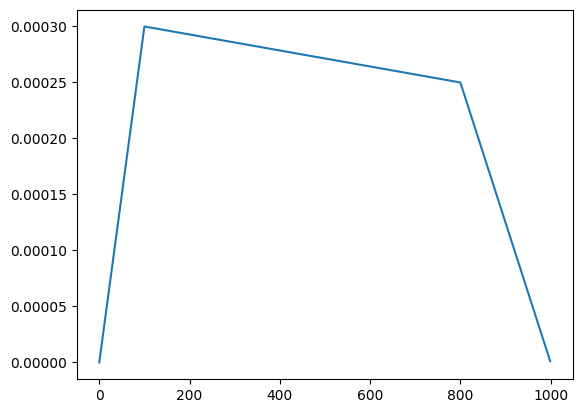

In [19]:
interp_values = [
    interp_single(step / total_num_steps, times, values)
    for step in range(total_num_steps)
]
plt.plot(interp_values)
plt.show()

In [15]:
%%timeit
interp_values = [
    interp_single(step / total_num_steps, times, values)
    for step in range(total_num_steps)
]

318 µs ± 1.34 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [18]:
%%timeit
interp_values = [np.interp(step, times, values) for step in range(total_num_steps)]

1.19 ms ± 2.97 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


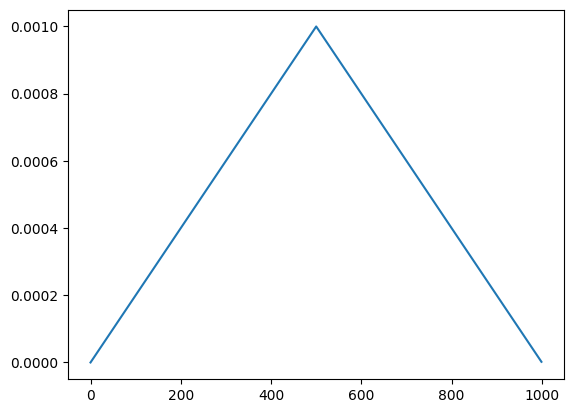

In [8]:
interp_values = [
    interp_single(step / total_num_steps, times, values)
    for step in range(total_num_steps)
]
plt.plot(interp_values)
plt.show()

In [32]:
interp_values_np = np.interp(steps / total_num_steps, times, values)
np.all(interp_values_np == interp_values)

True

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import _LRScheduler


class CustomScheduler(_LRScheduler):
    def __init__(self, optimizer, total_num_steps, last_epoch=-1):
        self.total_num_steps = total_num_steps
        super(CustomScheduler, self).__init__(optimizer, last_epoch)

    def get_lr(self):
        step = self.last_epoch
        times = [0, 0.5, 1]
        values = [0, 1e-3, 0]
        interp_values = np.interp(step / self.total_num_steps, times, values)
        return [base_lr * interp_values for base_lr in self.base_lrs]


# Assuming optimizer has two parameter groups
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = CustomScheduler(optimizer, total_num_steps=1000)

for epoch in range(100):
    # The following step should be included in your training loop
    scheduler.step()

    # Plot learning rate
    plt.figure()
    plt.plot(scheduler.get_lr())
    plt.show()

ModuleNotFoundError: No module named 'torch'